In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all' # to print multiple outputs from the same cell
import math
import utils
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from operator import index
from collections import defaultdict
from scipy.stats import pearsonr
from datetime import datetime, timedelta

In [2]:
users_df = pd.read_csv("dataset/users_df_dataset_cleaned_with_indicators.csv")

users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   user_id                            11109 non-null  int64 
 1   name                               11108 non-null  object
 2   lang                               11109 non-null  object
 3   bot                                11109 non-null  int64 
 4   created_at                         11109 non-null  object
 5   statuses_count                     11109 non-null  int64 
 6   account_age_in_days                11109 non-null  int64 
 7   number_of_tweets                   11109 non-null  int64 
 8   account_average_tweets_per_day     11109 non-null  int64 
 9   avg_tweets_per_actual_day          11109 non-null  int64 
 10  day_with_most_tweets               11109 non-null  object
 11  max_number_of_tweet_in_a_day       11109 non-null  int64 
 12  covi

In [3]:
users_df["created_at"] = pd.to_datetime(users_df["created_at"], errors="coerce")
users_df["day_with_most_tweets"] = pd.to_datetime(users_df["day_with_most_tweets"], errors="coerce")


Dropping columns that are not interesting from a correlation analysis standpoint.

In [4]:
columns_to_drop = ["user_id", "bot", "tweet_id", "account_created", "tweet_created", "text"]
correlation_df = users_df#.drop(columns_to_drop, axis=1)# Remove the drop if you want to see the correlation of all attributes in our datasets

In [5]:
correlation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11109 entries, 0 to 11108
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   user_id                            11109 non-null  int64         
 1   name                               11108 non-null  object        
 2   lang                               11109 non-null  object        
 3   bot                                11109 non-null  int64         
 4   created_at                         11109 non-null  datetime64[ns]
 5   statuses_count                     11109 non-null  int64         
 6   account_age_in_days                11109 non-null  int64         
 7   number_of_tweets                   11109 non-null  int64         
 8   account_average_tweets_per_day     11109 non-null  int64         
 9   avg_tweets_per_actual_day          11109 non-null  int64         
 10  day_with_most_tweets              

In [16]:
correlation_df.corr(method="spearman").style.background_gradient(cmap="coolwarm")

C:\Users\admin\AppData\Local\Temp\ipykernel_6096\3952732528.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_df.corr(method="spearman").style.background_gradient(cmap="coolwarm")


,user_id,bot,statuses_count,account_age_in_days,number_of_tweets,account_average_tweets_per_day,avg_tweets_per_actual_day,max_number_of_tweet_in_a_day,covid19_num_of_tweets,avg_hashtags,avg_text_length,avg_mentions,avg_special_char_in_text,total_likes,avt_favorite_count,total_replies,avt_reply_count,total_retweet_count,account_discussion_creation_ratio,tweet_num_likes_ratio,tweet_num_replies_ratio
user_id,1.000000,0.142237,-0.191305,-0.999731,-0.263784,-0.057360,-0.089162,-0.193703,-0.253325,-0.080628,-0.254502,-0.124379,-0.260799,-0.271023,-0.151060,-0.206086,-0.109052,-0.323290,0.449719,0.264344,-0.158227
bot,0.142237,1.000000,-0.344678,-0.141974,-0.325686,-0.279576,-0.234825,-0.271887,-0.716752,-0.087951,0.118094,-0.228770,0.156860,-0.317645,0.035074,0.124830,0.019325,-0.490954,0.334562,0.084774,0.137123
statuses_count,-0.191305,-0.344678,1.000000,0.190012,0.787617,0.492191,0.585669,0.715574,0.524674,0.087754,0.221289,0.158066,0.113437,0.676860,0.090771,-0.220400,-0.002592,0.674864,-0.141512,0.145848,-0.271071
account_age_in_days,-0.999731,-0.141974,0.190012,1.000000,0.263370,0.057345,0.088898,0.193175,0.253168,0.080680,0.254455,0.124335,0.260863,0.270394,0.150825,0.206066,0.109032,0.321853,-0.449382,-0.265068,0.158209
number_of_tweets,-0.263784,-0.325686,0.787617,0.263370,1.000000,0.321280,0.883490,0.917156,0.612671,0.047655,0.237241,0.185262,0.108863,0.784584,0.049383,-0.284527,-0.012530,0.708230,-0.054474,0.183649,-0.341419
account_average_tweets_per_day,-0.057360,-0.279576,0.492191,0.057345,0.321280,1.000000,0.221220,0.262059,0.376407,0.047224,-0.025170,0.093242,-0.060052,0.300597,0.011109,-0.082575,-0.013687,0.363909,-0.215620,-0.063189,-0.094406
avg_tweets_per_actual_day,-0.089162,-0.234825,0.585669,0.088898,0.883490,0.221220,1.000000,0.911890,0.517486,0.023182,0.174796,0.173355,0.044038,0.693246,0.021250,-0.345657,-0.008000,0.570026,0.063938,0.180765,-0.409355
max_number_of_tweet_in_a_day,-0.193703,-0.271887,0.715574,0.193175,0.917156,0.262059,0.911890,1.000000,0.555564,0.050052,0.247767,0.183520,0.116288,0.779893,0.086391,-0.304021,0.006625,0.669598,-0.066780,0.121453,-0.372645
covid19_num_of_tweets,-0.253325,-0.716752,0.524674,0.253168,0.612671,0.376407,0.517486,0.555564,1.000000,0.095955,-0.086507,0.324315,-0.158857,0.575791,0.004147,-0.173308,-0.000517,0.742145,-0.460582,-0.120655,-0.207676
avg_hashtags,-0.080628,-0.087951,0.087754,0.080680,0.047655,0.047224,0.023182,0.050052,0.095955,1.000000,0.155457,0.086939,0.150043,0.046728,-0.004630,-0.008324,0.006756,0.077617,-0.065050,-0.014070,-0.015029


<Figure size 2000x1000 with 0 Axes>

C:\Users\admin\AppData\Local\Temp\ipykernel_6096\1718733384.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(correlation_df.corr(method="spearman"), annot = True, cmap="viridis", mask=np.triu(correlation_df.corr(method="spearman")))#, figsize=(10,10)


<AxesSubplot: >

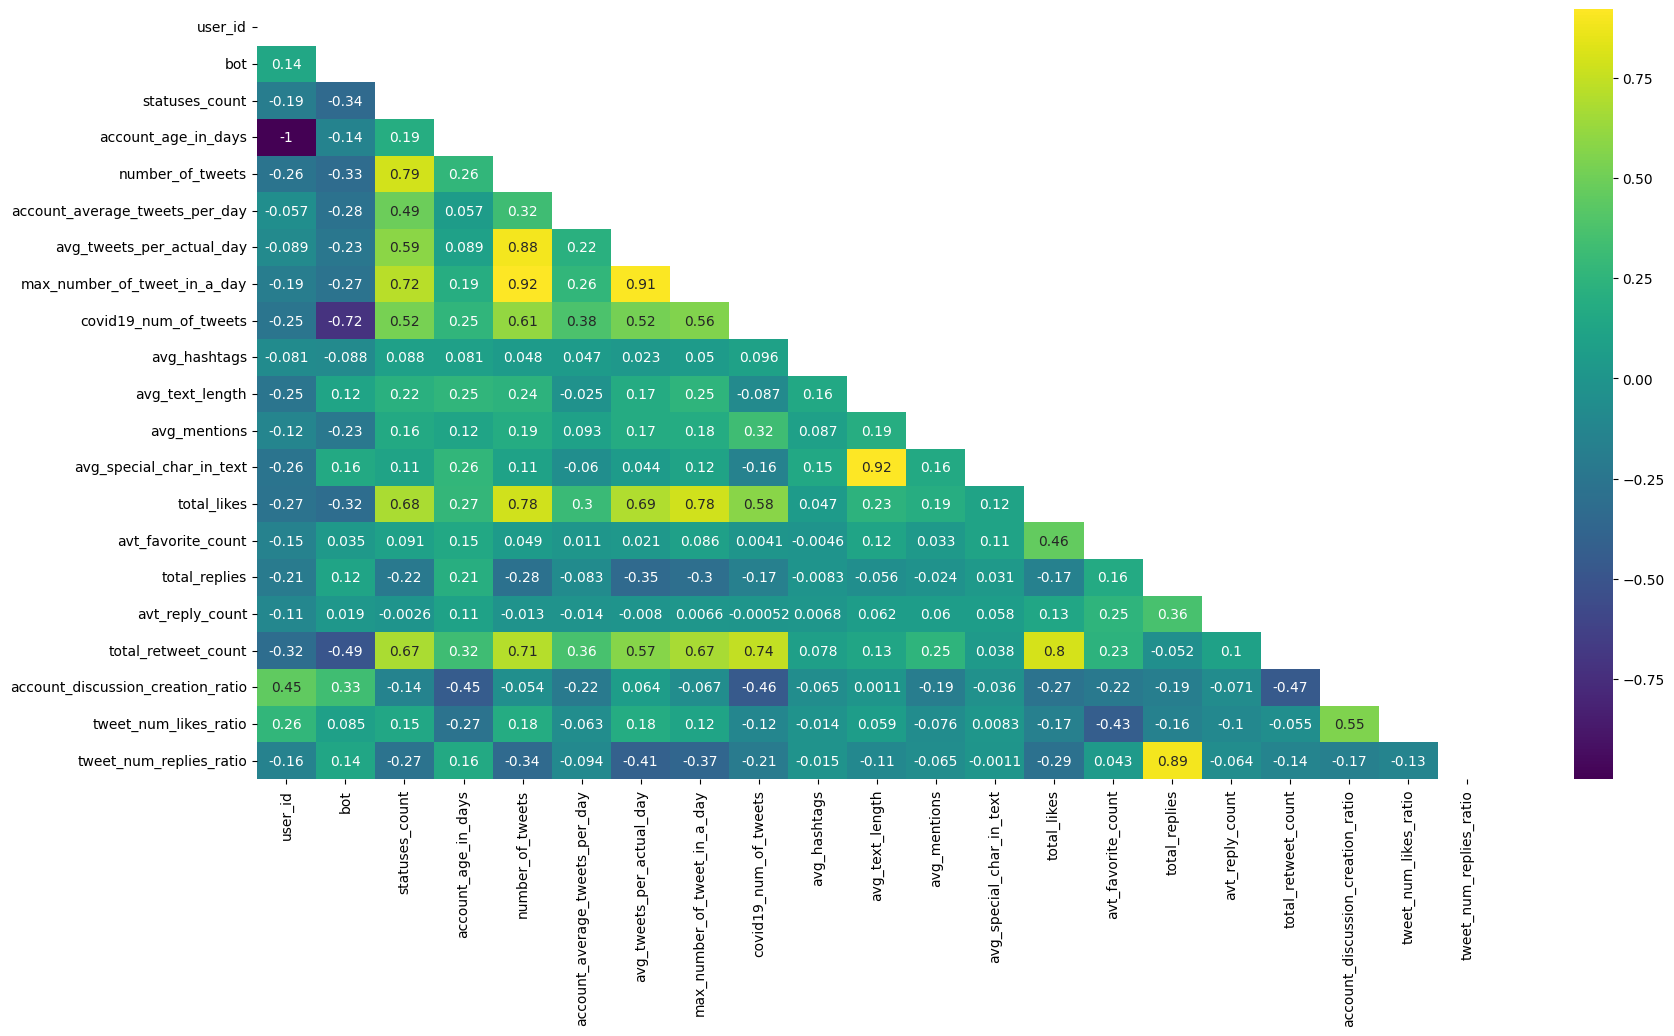

In [23]:
plt.figure(figsize = (20,10))
sns.heatmap(correlation_df.corr(method="spearman"), annot = True, cmap="viridis", mask=np.triu(correlation_df.corr(method="spearman")))#, figsize=(10,10)

Highlighting correlating attributes where correlation is lower than -0.5 or higher than 0.5. Excluding obvious correlation like being correlated with yourself.

C:\Users\admin\AppData\Local\Temp\ipykernel_6096\4043204526.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfCorr = correlation_df.corr(method="spearman")


<Figure size 1600x600 with 0 Axes>

<AxesSubplot: >

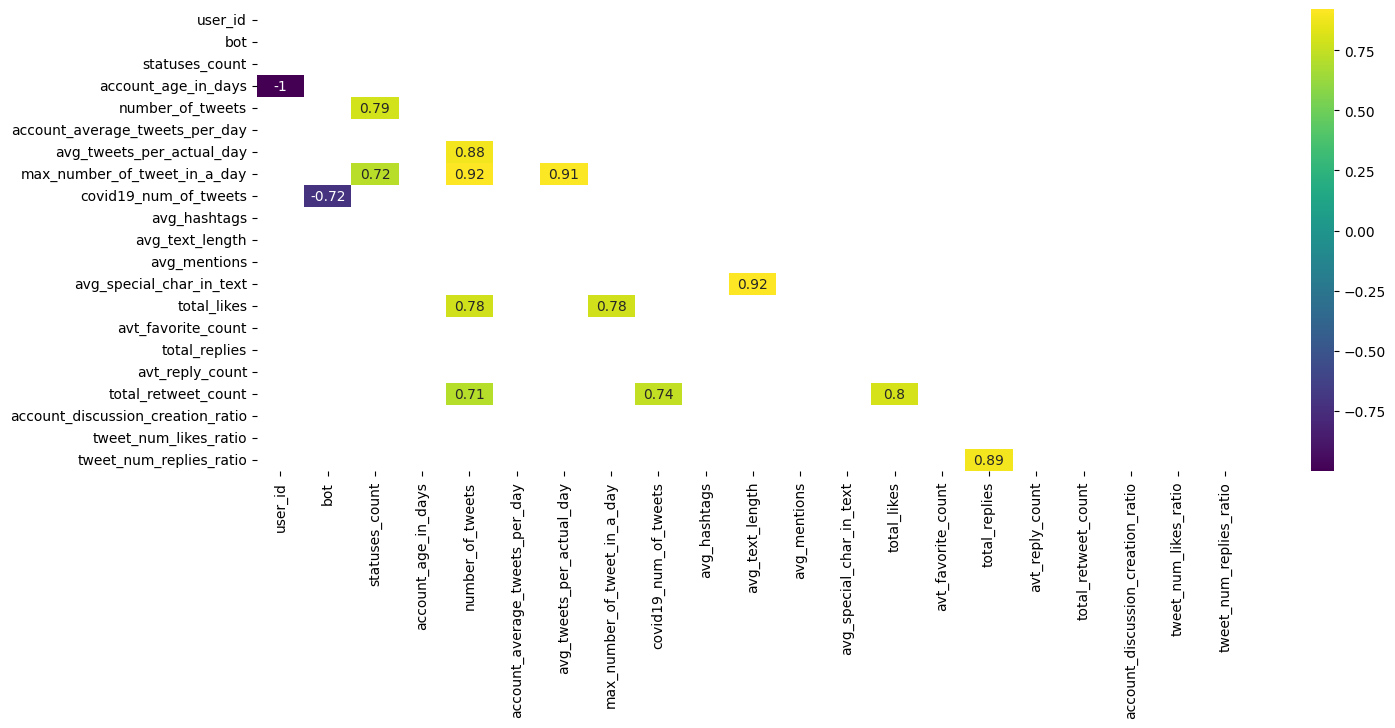

In [22]:
dfCorr = correlation_df.corr(method="spearman")
filteredDf = dfCorr[((dfCorr >= .7) | (dfCorr <= -.7)) & (dfCorr !=1.000)] # We need to find the best correlation treshold
plt.figure(figsize=(16,6))
sns.heatmap(filteredDf, annot=True, cmap="viridis",mask=np.triu(filteredDf))
plt.show()

We can see from the plot above that the number of tweets an account have made ("statuses_count") and its average tweets per day("account_average_tweets_per_day"), has a high correlation. We also see that the length of the tweet("text_length"), and the number of special charackters it contains("special_char_in_text") has a high correlation. 

<AxesSubplot: xlabel='number_of_tweets', ylabel='max_number_of_tweet_in_a_day'>

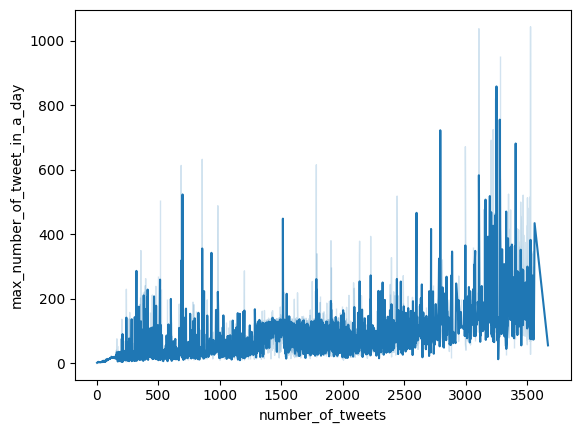

In [29]:
#sns.regplot(x=correlation_df["column_name"], y=correlation_df["column_name"], fit_reg= True)
sns.lineplot(data=users_df, y="max_number_of_tweet_in_a_day",x="number_of_tweets")

<AxesSubplot: xlabel='number_of_tweets', ylabel='max_number_of_tweet_in_a_day'>

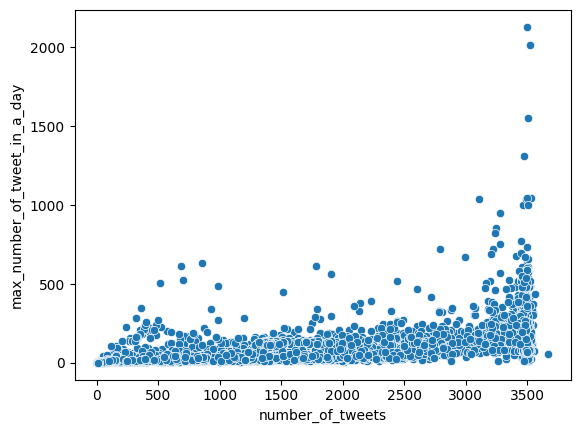

In [31]:
sns.scatterplot(data=users_df, y="max_number_of_tweet_in_a_day",x="number_of_tweets")